In [1]:
import pandas as pd
import numpy as np
import glob
import os
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
metadata = pd.read_csv("musicnet_metadata.csv")

In [3]:
mozart_metadata = metadata[metadata['composer']=='Mozart']

In [4]:
path = '/Users/paarthgoyal/Desktop/Mozart Only/Mozart_CSV_Files'
all_files = glob.glob(path + "/*.csv")
li = []

for filename in all_files:
    df = pd.read_csv(filename)
    df['id'] = os.path.basename(filename[:-4])
    li.append(df)
mozart_song_data = pd.concat(li, axis=0, ignore_index=True)
mozart_song_data['id'] = mozart_song_data['id'].astype(str).astype(int)

In [5]:
song_1788 = mozart_song_data[mozart_song_data['id'] == 1788]
song_1788_original_notes = song_1788['note']
song_1788 = song_1788.drop(columns = 'note')

In [6]:
mozart_df = metadata.merge(mozart_song_data, on = 'id')
mozart_df = mozart_df.drop(['source', 'transcriber', 'catalog_name','composer'], axis=1)

In [7]:
mozart_df_encoded = pd.get_dummies(mozart_df, columns=['composition', 'movement', 'ensemble', 'note_value'])
for col in mozart_df_encoded.select_dtypes(include=['bool']).columns:
    mozart_df_encoded[col] = mozart_df_encoded[col].astype(int)

In [8]:
to_predict = mozart_df_encoded[mozart_df_encoded['id'] == 1788]
to_predict = to_predict.drop(columns = 'note')
scaler = StandardScaler()
to_predict = pd.DataFrame(scaler.fit_transform(to_predict), columns=to_predict.columns)

In [9]:
to_predict.head()

,id,seconds,start_time,end_time,instrument,start_beat,end_beat,composition_Clarinet Quintet in A major,composition_Piano Trio No 3 in B-flat major,composition_Piano Trio No 4 in E major,...,note_value_Sixty Fourth,note_value_Thirty Second,note_value_Tied Quarter-Sixteenth,note_value_Tied Quarter-Thirty Second,note_value_Triplet,note_value_Triplet Sixteenth,note_value_Triplet Sixty Fourth,note_value_Triplet Thirty Second,note_value_Unknown,note_value_Whole
0,0.0,0.0,-2.351555,-2.353300,1.615753,-1.783513,-0.649338,0.0,0.0,0.0,...,-0.042397,-0.124861,-0.097256,0.0,-0.11458,2.45063,0.0,-0.263214,0.0,-0.014121
1,0.0,0.0,-2.344714,-2.346544,1.615753,-1.781706,-0.649338,0.0,0.0,0.0,...,-0.042397,-0.124861,-0.097256,0.0,-0.11458,2.45063,0.0,-0.263214,0.0,-0.014121
2,0.0,0.0,-2.338694,-2.339880,1.615753,-1.779898,-0.649338,0.0,0.0,0.0,...,-0.042397,-0.124861,-0.097256,0.0,-0.11458,2.45063,0.0,-0.263214,0.0,-0.014121
3,0.0,0.0,-2.332765,-2.334403,1.615753,-1.778090,-0.649338,0.0,0.0,0.0,...,-0.042397,-0.124861,-0.097256,0.0,-0.11458,2.45063,0.0,-0.263214,0.0,-0.014121
4,0.0,0.0,-2.325285,-2.326644,1.615753,-1.776282,-0.649338,0.0,0.0,0.0,...,-0.042397,-0.124861,-0.097256,0.0,-0.11458,2.45063,0.0,-0.263214,0.0,-0.014121


In [10]:
# removing all instances of the song with id 1788 from the data as we have to make final predictions on it
mozart_df_encoded = mozart_df_encoded[mozart_df_encoded['id'] != 1788]

In [11]:
mozart_df_encoded_y = mozart_df_encoded['note']
mozart_df_encoded_X = mozart_df_encoded.drop(columns='note')
scaler = StandardScaler()
mozart_df_encoded_X = pd.DataFrame(scaler.fit_transform(mozart_df_encoded_X), columns=mozart_df_encoded_X.columns)

In [12]:
mozart_df_encoded_X.head()

,id,seconds,start_time,end_time,instrument,start_beat,end_beat,composition_Clarinet Quintet in A major,composition_Piano Trio No 3 in B-flat major,composition_Piano Trio No 4 in E major,...,note_value_Sixty Fourth,note_value_Thirty Second,note_value_Tied Quarter-Sixteenth,note_value_Tied Quarter-Thirty Second,note_value_Triplet,note_value_Triplet Sixteenth,note_value_Triplet Sixty Fourth,note_value_Triplet Thirty Second,note_value_Unknown,note_value_Whole
0,-1.134042,0.58492,-1.616349,-1.609248,0.305262,-1.385522,0.657847,-0.432187,-0.322829,-0.316451,...,-0.118866,-0.282759,-0.057785,-0.019516,-0.207786,-0.294994,-0.028856,-0.123126,-0.047255,-0.06031
1,-1.134042,0.58492,-1.616349,-1.609248,0.253780,-1.385522,0.657847,-0.432187,-0.322829,-0.316451,...,-0.118866,-0.282759,-0.057785,-0.019516,-0.207786,-0.294994,-0.028856,-0.123126,-0.047255,-0.06031
2,-1.134042,0.58492,-1.616349,-1.609248,0.202298,-1.385522,0.657847,-0.432187,-0.322829,-0.316451,...,-0.118866,-0.282759,-0.057785,-0.019516,-0.207786,-0.294994,-0.028856,-0.123126,-0.047255,-0.06031
3,-1.134042,0.58492,-1.616349,-1.610987,0.202298,-1.385522,0.354382,-0.432187,-0.322829,-0.316451,...,-0.118866,-0.282759,-0.057785,-0.019516,-0.207786,-0.294994,-0.028856,-0.123126,-0.047255,-0.06031
4,-1.134042,0.58492,-1.606281,-1.599821,0.305262,-1.381303,0.657847,-0.432187,-0.322829,-0.316451,...,-0.118866,-0.282759,-0.057785,-0.019516,-0.207786,-0.294994,-0.028856,-0.123126,-0.047255,-0.06031


In [13]:
mozart_df_encoded_X_train, mozart_df_encoded_X_test, mozart_df_encoded_y_train, mozart_df_encoded_y_test = train_test_split(mozart_df_encoded_X, mozart_df_encoded_y, test_size=0.2, random_state=42)
# splitting the data into training and test sets

In [14]:
softmax_model = LogisticRegression(multi_class='multinomial', solver='saga', max_iter = 150)
softmax_model.fit(mozart_df_encoded_X_train, mozart_df_encoded_y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=150, multi_class='multinomial', solver='saga')

In [15]:
y_pred_test = softmax_model.predict(mozart_df_encoded_X_test)

In [16]:
accuracy = accuracy_score(mozart_df_encoded_y_test, y_pred_test)
precision = precision_score(mozart_df_encoded_y_test, y_pred_test, average='weighted') 
recall = recall_score(mozart_df_encoded_y_test, y_pred_test, average='weighted')
f1 = f1_score(mozart_df_encoded_y_test, y_pred_test, average='weighted') 
macro_f1 = f1_score(mozart_df_encoded_y_test, y_pred_test, average='macro')
print("Error metrics for softmax classifier")
print("Accuracy : ", accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("F1 : ",f1)
print("Macro_F1 : ",macro_f1)

Error metrics for softmax classifier
Accuracy :  0.09151801452443066
Precision :  0.08670046694896466
Recall :  0.09151801452443066
F1 :  0.07353243754484322
Macro_F1 :  0.0445395274743231


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
y_pred = softmax_model.predict(to_predict)

In [18]:
song_1788['note'] = y_pred.astype(int)
song_1788 = song_1788.drop(columns = ['id'])
original_order = ['start_time','end_time','instrument','note','start_beat','end_beat','note_value']
song_1788 = song_1788[original_order]

In [19]:
song_1788.head()

,start_time,end_time,instrument,note,start_beat,end_beat,note_value
0,14302,26589,43,74,0.0,0.2,Triplet Sixteenth
1,52702,64478,43,74,0.5,0.2,Triplet Sixteenth
2,86494,101854,43,74,1.0,0.2,Triplet Sixteenth
3,119774,132574,43,74,1.5,0.2,Triplet Sixteenth
4,161758,176094,43,74,2.0,0.2,Triplet Sixteenth


In [20]:
song_1788['note'].unique()

array([74, 62, 45, 66, 60, 69, 57, 64, 73, 44, 76, 52, 68])

In [21]:
song_1788.to_csv('1788_softmax_generated.csv', index=False)

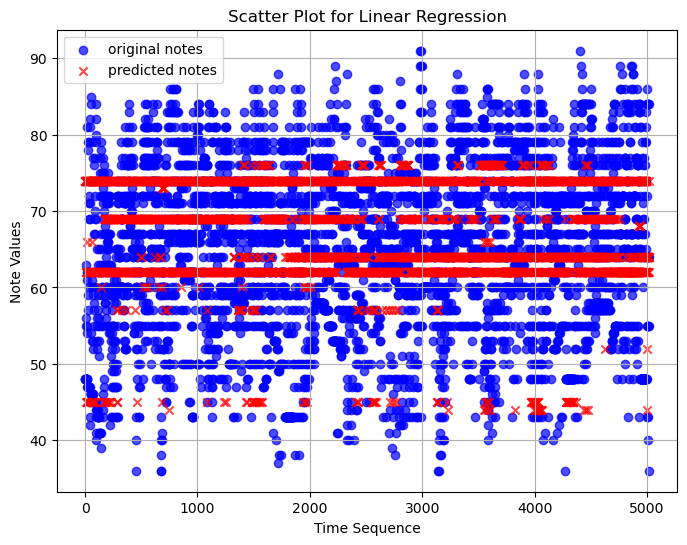

In [22]:
# X-axis values (1 to length of the arrays)
x_values = np.arange(1, len(song_1788_original_notes) + 1)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_values, song_1788_original_notes, color='blue', label='original notes', alpha=0.7, marker='o')
plt.scatter(x_values, y_pred, color='red', label='predicted notes', alpha=0.7, marker='x')

# Adding labels, legend, and grid
plt.xlabel('Time Sequence')
plt.ylabel('Note Values')
plt.title('Scatter Plot for Linear Regression')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()